In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key = '904a4bd144508c0f00ce519a47aee42282f96724')


C:\Users\dell\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
#df.to_csv('market.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('market.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-13 00:00:00+00:00,139.20,139.4300,138.820,138.85,17421717,32.851733,32.906013,32.762051,32.769131,69686868,0.0,1.0
1,AAPL,2017-03-14 00:00:00+00:00,138.99,139.6500,138.840,139.30,15309065,32.802172,32.957934,32.766771,32.875333,61236260,0.0,1.0
2,AAPL,2017-03-15 00:00:00+00:00,140.46,140.7501,139.025,139.41,25691774,33.149097,33.217562,32.810432,32.901293,102767096,0.0,1.0
3,AAPL,2017-03-16 00:00:00+00:00,140.69,141.0200,140.260,140.72,19231998,33.203378,33.281260,33.101897,33.210458,76927992,0.0,1.0
4,AAPL,2017-03-17 00:00:00+00:00,139.99,141.0000,139.890,141.00,43884952,33.038176,33.276539,33.014575,33.276539,175539808,0.0,1.0


In [6]:
df1 = df.reset_index()['close']
df1

0       139.20
1       138.99
2       140.46
3       140.69
4       139.99
         ...  
1254    163.17
1255    159.30
1256    157.44
1257    162.95
1258    158.52
Name: close, Length: 1259, dtype: float64

In [7]:
df1.shape

(1259,)

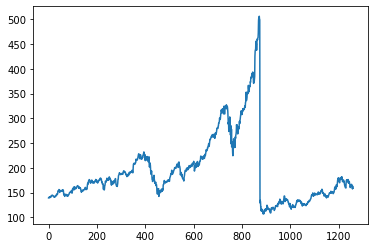

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.08105197],
       [0.08052599],
       [0.08420789],
       ...,
       [0.12673763],
       [0.14053851],
       [0.12944271]])

In [12]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], [] 
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step) 

In [15]:
X_train.shape

(717, 100)

In [16]:
y_train.shape

(717,)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
12/12 [==============================] - 12s 359ms/step - loss: 0.0271 - val_loss: 0.0044
Epoch 2/10
12/12 [==============================] - 3s 213ms/step - loss: 0.0062 - val_loss: 0.0104
Epoch 3/10
12/12 [==============================] - 3s 213ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/10
12/12 [==============================] - 3s 224ms/step - loss: 0.0014 - val_loss: 2.5829e-04
Epoch 5/10
12/12 [==============================] - 3s 230ms/step - loss: 0.0011 - val_loss: 2.2892e-04
Epoch 6/10
12/12 [==============================] - 2s 200ms/step - loss: 9.4976e-04 - val_loss: 2.4276e-04
Epoch 7/10
12/12 [==============================] - 2s 199ms/step - loss: 8.8809e-04 - val_loss: 2.8820e-04
Epoch 8/10
12/12 [==============================] - 2s 199ms/step - loss: 8.5348e-04 - val_loss: 2.8968e-04
Epoch 9/10
12/12 [==============================] - 2s 199ms/step - loss: 8.1856e-04 - val_loss: 2.2129e-04
Epoch 10/10
12/12 [==============================] - 2s 200

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.8.0'

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

214.2078548166404

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

146.37014050038303

In [ ]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
